# EDA with Pandas

In [ ]:
# !pip install xlrd

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps, ImageColor

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional

import re

from wordcloud import WordCloud
import seaborn as sns
import folium

In [ ]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
sheet_name='Canada by Citizenship',
skiprows=range(20),
skipfooter=2
)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
print(df_can.shape)

(195, 43)


In [ ]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

In [ ]:
df_can.set_index('Country', inplace = True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
years = list(range(1980, 2014))

df_can['Total'] =  df_can[years].sum(axis = 1)

print ('data dimensions:', df_can.shape)
df_can.head()

data dimensions: (195, 38)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
plt.figure(figsize=(10, 6))

df_indonesia = df_can.loc['Indonesia', years]
df_indonesia.head()

,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


<Figure size 1000x600 with 0 Axes>

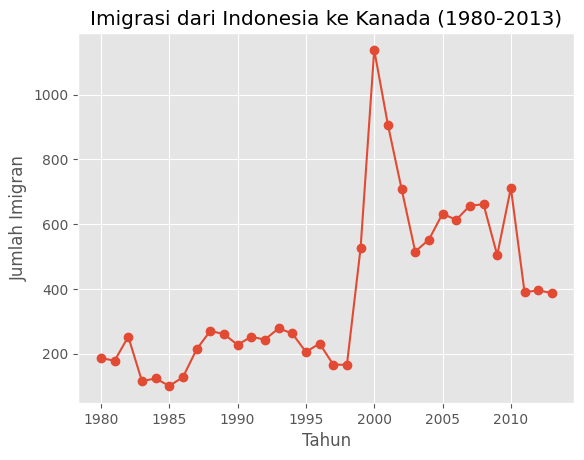

In [ ]:
df_indonesia.plot(kind='line', marker='o')

plt.title('Imigrasi dari Indonesia ke Kanada (1980-2013)')
plt.ylabel('Jumlah Imigran')
plt.xlabel('Tahun')
plt.show()

# Word Cloud

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [ ]:
import re

max_words = 10000
word_string = ''
for country in df_can.index.values:
  country_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', country)
  country_cleaned = ''.join(word.capitalize() for word in country_cleaned.split())
  country_count = df_can.loc[country, 'Total']
  print(country_cleaned, country_count)

  repeat_num_times = int(country_count / total_immigration * max_words )
  word_string = word_string + ((country_cleaned + ' ') * repeat_num_times)


word_string

Afghanistan 58639
Albania 15699
Algeria 69439
AmericanSamoa 6
Andorra 15
Angola 2113
AntiguaAndBarbuda 981
Argentina 19596
Armenia 3310
Australia 23829
Austria 4985
Azerbaijan 2649
Bahamas 808
Bahrain 475
Bangladesh 65568
Barbados 6923
Belarus 7975
Belgium 10762
Belize 1083
Benin 2852
Bhutan 5876
BoliviaPlurinationalStateOf 3205
BosniaAndHerzegovina 21855
Botswana 396
Brazil 29659
BruneiDarussalam 600
Bulgaria 23310
BurkinaFaso 2043
Burundi 8110
CaboVerde 201
Cambodia 6538
Cameroon 16021
Canada 20
CentralAfricanRepublic 550
Chad 1653
Chile 21359
China 659962
ChinaHongKongSpecialAdministrativeRegion 9327
ChinaMacaoSpecialAdministrativeRegion 284
Colombia 72088
Comoros 194
Congo 1686
CostaRica 4489
CteDivoire 8291
Croatia 8001
Cuba 20365
Cyprus 1126
CzechRepublic 4192
DemocraticPeoplesRepublicOfKorea 388
DemocraticRepublicOfTheCongo 25582
Denmark 3901
Djibouti 1646
Dominica 2470
DominicanRepublic 11193
Ecuador 12233
Egypt 72745
ElSalvador 54878
EquatorialGuinea 61
Eritrea 10450
Estonia 9

'Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afg

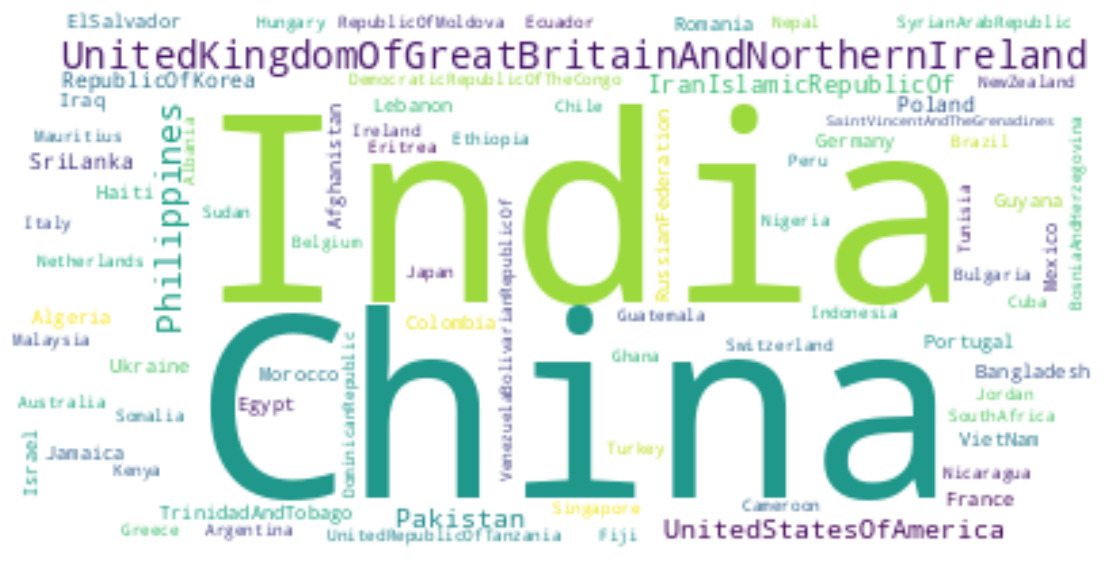

In [ ]:
wc_can = WordCloud(
    background_color='white',
    collocations=False
    )

wc_can.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!wget --quiet https://raw.githubusercontent.com/stefkwan-h8/dataset/698260b1725f1ca2ee3e4bfd41394e0919a7ef96/canada_mask.png -O canada_mask.png

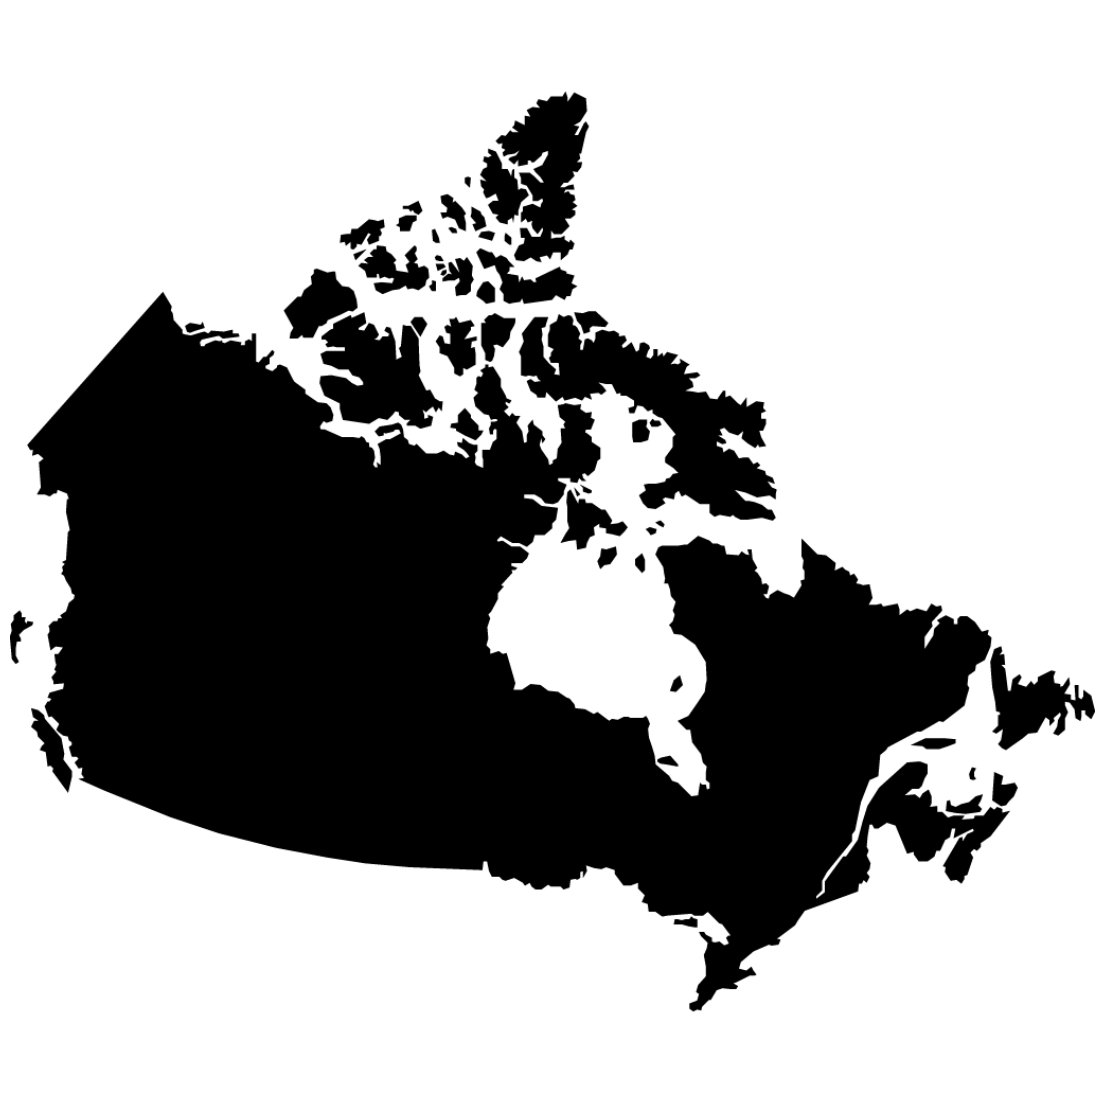

In [ ]:
from PIL import ImageOps

canada_mask = Image.open('canada_mask.png').convert('RGBA')
white_bg = Image.new('RGBA', canada_mask.size, 'WHITE')
canada_mask = Image.alpha_composite(white_bg, canada_mask)
canada_mask = canada_mask.convert('L')
canada_mask = np.array(canada_mask)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(canada_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

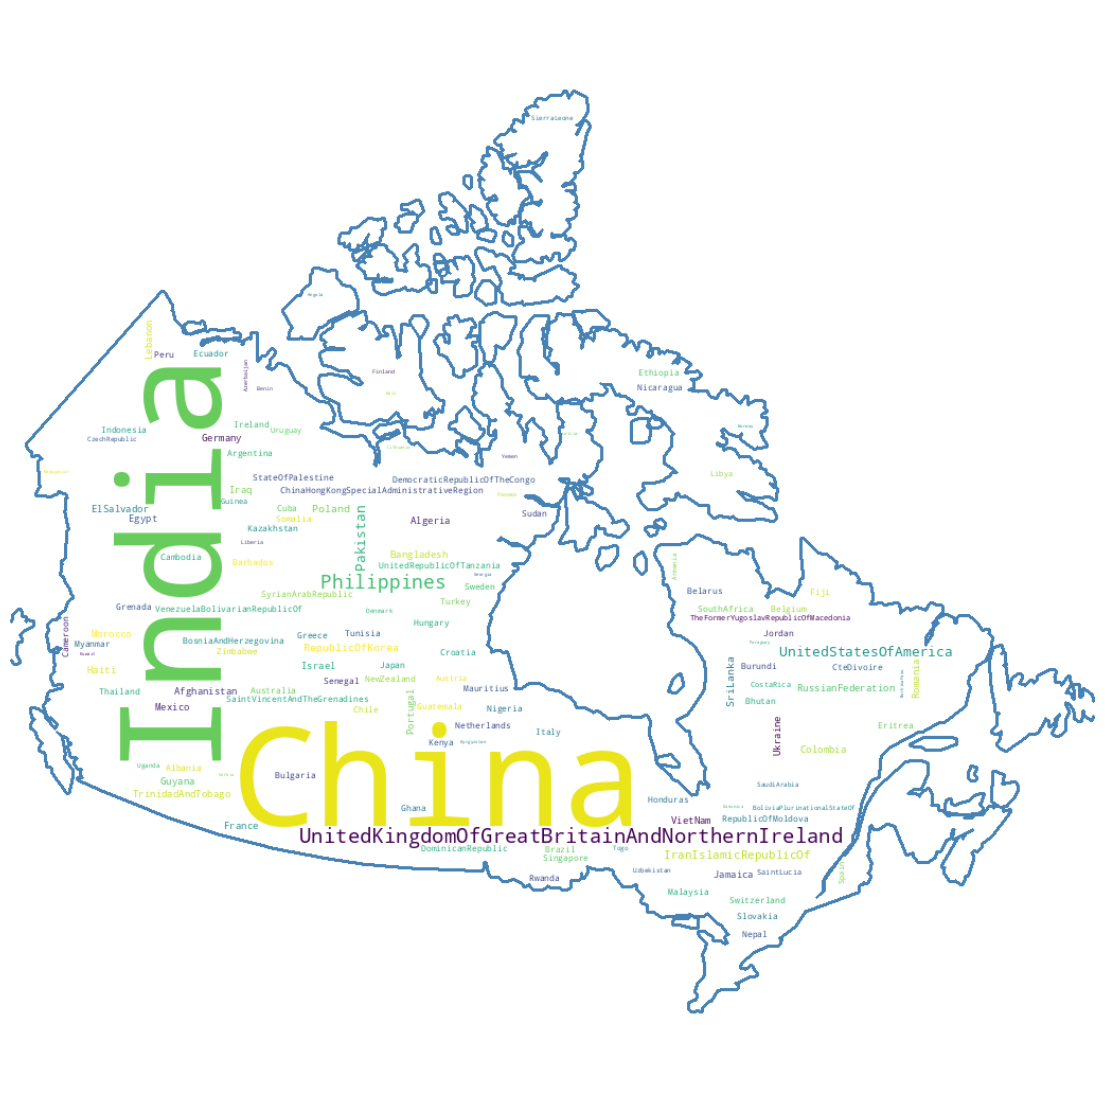

In [ ]:
wc_can = WordCloud(
    background_color='white',
    collocations=False,
    mask=canada_mask,
    contour_width=3,
    contour_color='steelblue'
    )

wc_can.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

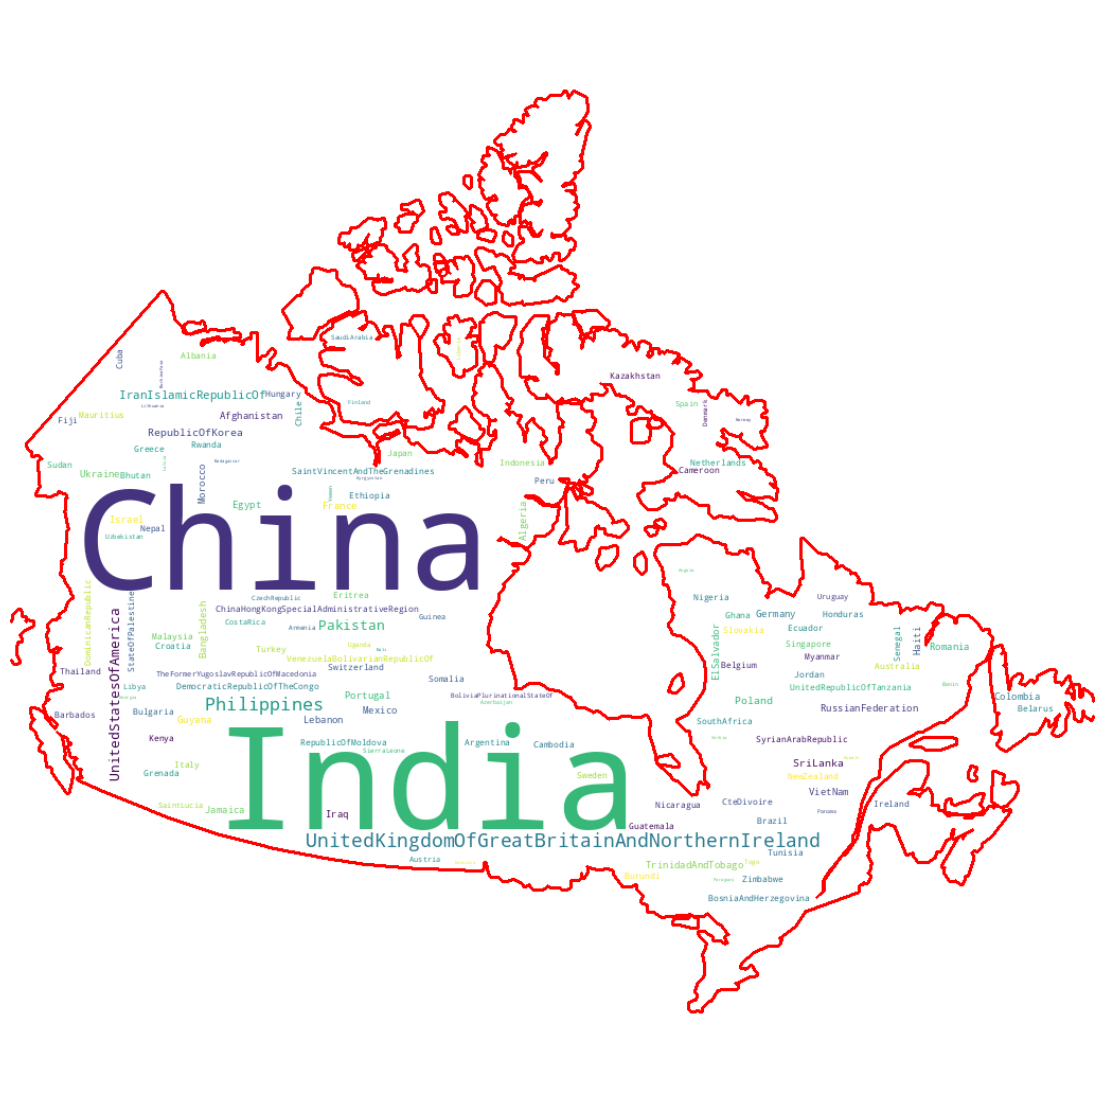

In [ ]:
from PIL import ImageColor

canada_red = ImageColor.getrgb("#FF0000")

wc_can = WordCloud(
    background_color='white',
    collocations=False,
    mask=canada_mask,
    contour_width=3,
    contour_color=canada_red
    )

wc_can.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

In [ ]:
# !pip install seaborn
import seaborn as sns

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_total = df_can[years].sum(axis=0)
df_total = pd.DataFrame(df_total)

df_total = df_total.reset_index()
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


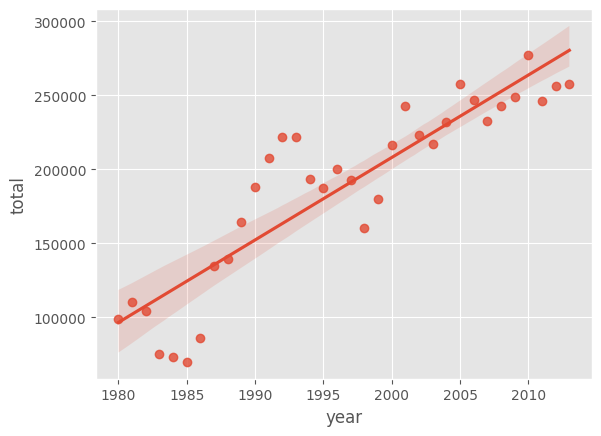

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_total)

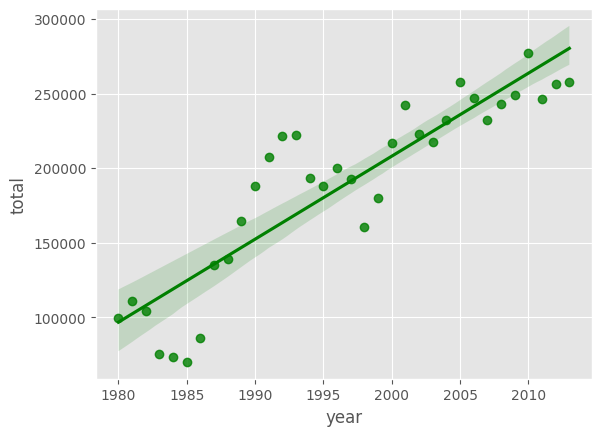

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green')

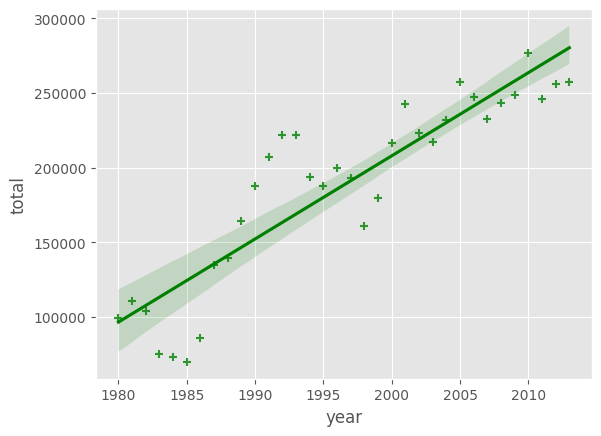

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

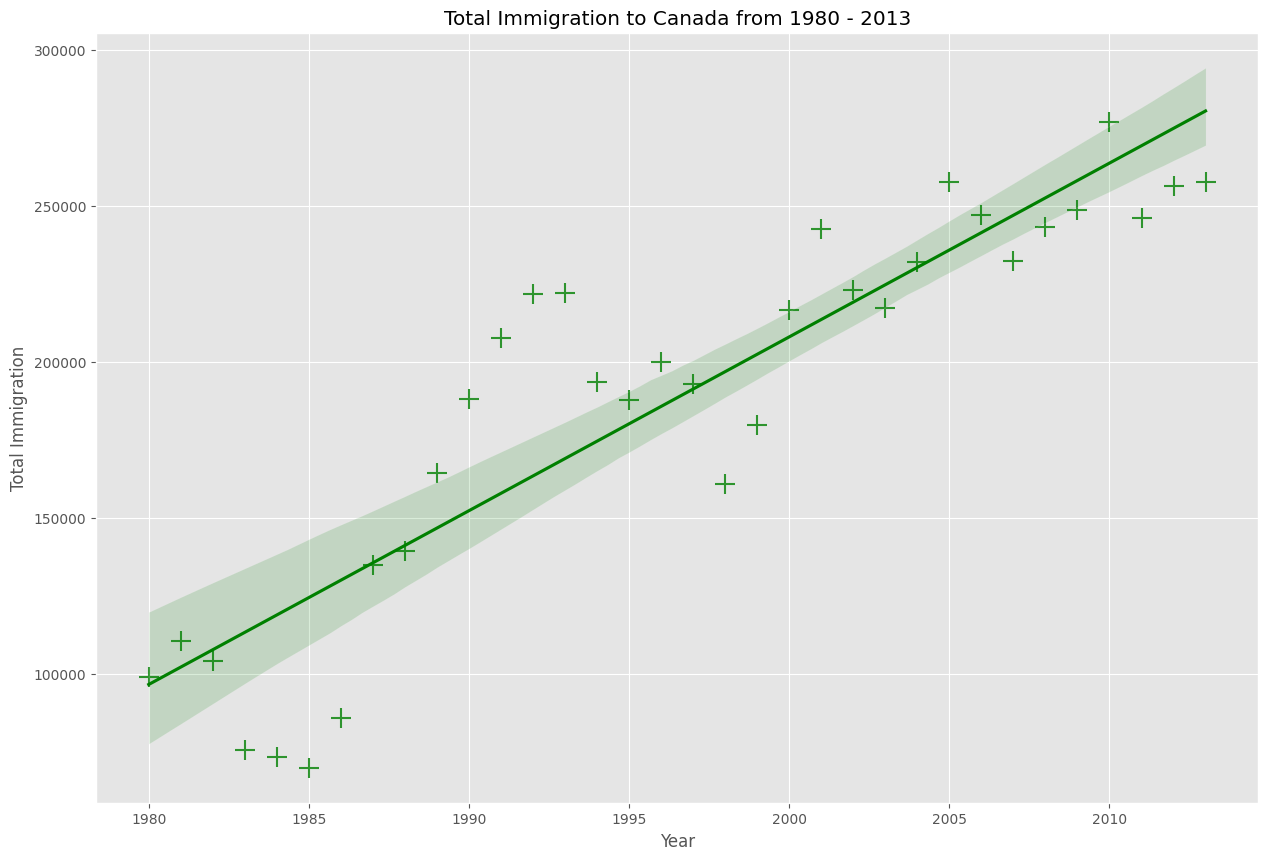

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

sns.set(font_scale=1.5)

plt.show()

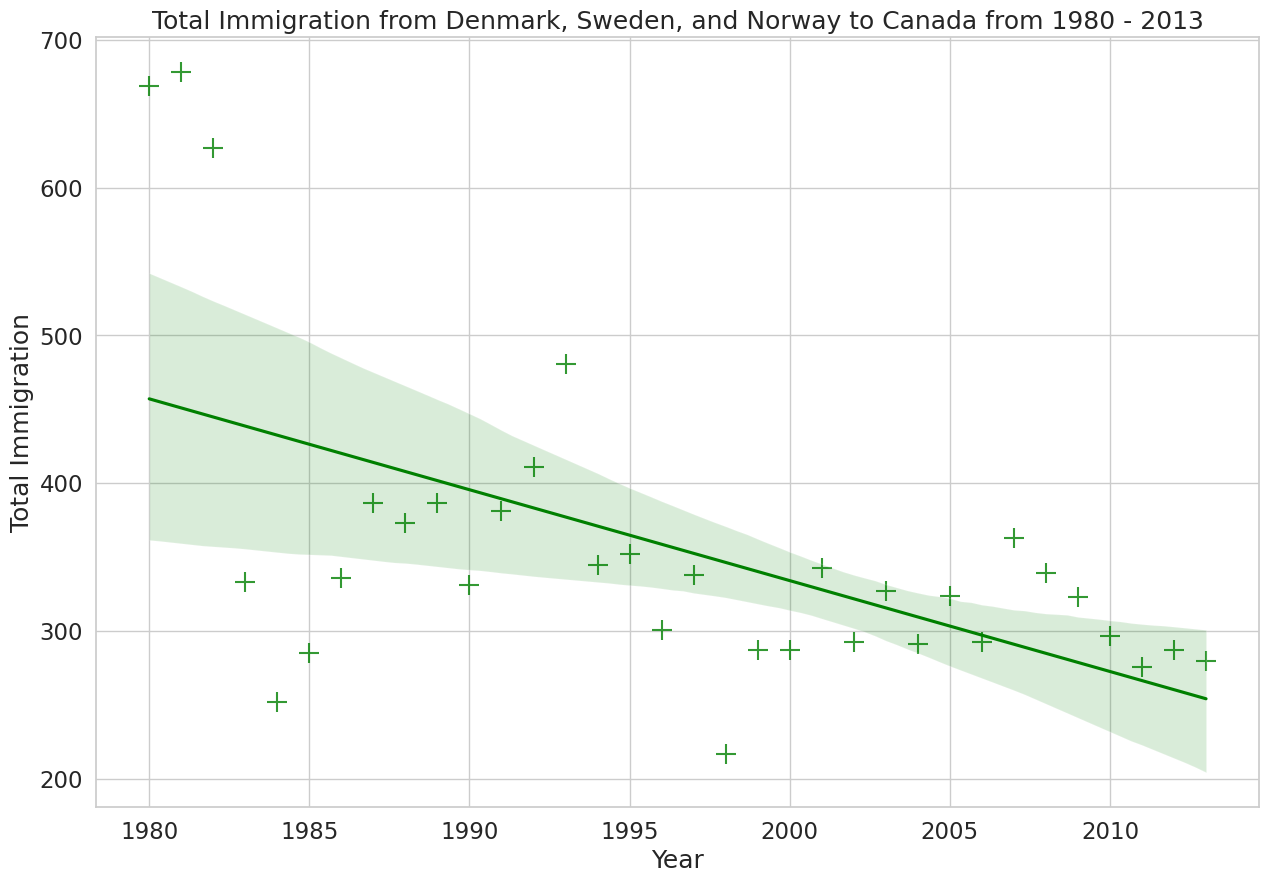

In [ ]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_scandinavia = pd.DataFrame(df_countries.sum(axis=1))
df_scandinavia.reset_index(inplace=True)
df_scandinavia.columns = ['year', 'total']
df_scandinavia['year'] = df_scandinavia['year'].astype(int)

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_scandinavia, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
plt.show()

# Map

In [ ]:
# !pip install folium
import folium

world_map = folium.Map()
world_map

In [ ]:
semarang_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)
semarang_map

In [ ]:
hacktiv8_map = folium.Map(location=[-6.260707913988698, 106.78170299181926], zoom_start=15)
hacktiv8_map

In [ ]:
hacktiv8_map = folium.Map(
    location=[-6.260707913988698, 106.78170299181926],
    zoom_start=15,
    tiles='Cartodb Positron')
hacktiv8_map

## Map with Marker - San Francisco

In [ ]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
df_incidents.shape

(150500, 13)

In [ ]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape

(100, 13)

In [ ]:
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

sanfran_map

In [ ]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

sanfran_map.add_child(incidents)

In [ ]:
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

In [ ]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map

In [ ]:
from folium import plugins

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

sanfran_map

## Choropleth Map - Canada Immigration

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_can = df_can.reset_index()

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

In [ ]:
world_geo = r'world_countries.json'

In [ ]:
world_map = folium.Map(
   location=[0,0],
   zoom_start=2,
)

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map

### Custom Mapbox tileset

In [ ]:
akses_token= "pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY20xY3hybGpiMmRtZDJsc2o0dWt4d3l4aiJ9.vNIHGxgkSzrg-_ZgwDzCvQ"
tileset_id= "mapbox.mapbox-terrain-dem-v1"
mapbox_link= "https://api.mapbox.com/v4/"+tileset_id+"/{z}/{x}/{y}{@2x}.png"
tiles_link= mapbox_link + "?access_token=" + akses_token

map_with_tile = folium.Map(
   location=[0,0],
   zoom_start=2,
   tiles=tiles_link,
   attr=tileset_id
)

map_with_tile

In [ ]:
akses_token= "pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY20xY3hybGpiMmRtZDJsc2o0dWt4d3l4aiJ9.vNIHGxgkSzrg-_ZgwDzCvQ"
# menggunakan tileset yang tidak ada akan membuat Map kosong
tileset_id= "hacktiv8.notileset"
mapbox_link= "https://api.mapbox.com/v4/"+tileset_id+"/{z}/{x}/{y}{@2x}.png"
tiles_link= mapbox_link + "?access_token=" + akses_token

world_map = folium.Map(
   location=[0,0],
   zoom_start=2,
   tiles=tiles_link,
   attr=tileset_id
)

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map